# About Dataset
https://www.kaggle.com/datasets/ucsandiego/carbon-dioxide
Context
The carbon dioxide record from Mauna Loa Observatory, known as the “Keeling Curve,” is the world’s longest unbroken record of atmospheric carbon dioxide concentrations. Scientists make atmospheric measurements in remote locations to sample air that is representative of a large volume of Earth’s atmosphere and relatively free from local influences.

Content
This dataset includes a monthly observation of atmospheric carbon dioxide (or CO2) concentrations from the Mauna Loa Observatory (Hawaii) at a latitude of 19.5, longitude of -155.6, and elevation of 3397 meters.

Columns 1-3: Provide the date in the following redundant formats: year, month and decimal date
Column 4: Monthly CO2 concentrations in parts per million (ppm) measured on the 08A calibration scale and collected at 24:00 hours on the fifteenth of each month.
Column 5: The fifth column provides the same data after a seasonal adjustment, which involves subtracting from the data a 4-harmonic fit with a linear gain factor to remove the seasonal cycle from carbon dioxide measurements
Column 6: The sixth column provides the data with noise removed, generated from a stiff cubic spline function plus 4-harmonic functions with linear gain
Column 7: The seventh column is the same data with the seasonal cycle removed.
Acknowledgements
The carbon dioxide data was collected and published by the University of California's Scripps Institution of Oceanography under the supervision of Charles David Keeling with support from the US Department of Energy, Earth Networks, and the National Science Foundation.

Inspiration
How have atmospheric carbon dioxide levels changed in the past sixty years? How do carbon dioxide concentrations change seasonally? What do you think causes this seasonal cycle? When will the carbon dioxide levels exceed 450 parts per million?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('archive.csv')
df

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...,...
715,2017,8,2017.6219,NaN,NaN,NaN,NaN
716,2017,9,2017.7068,NaN,NaN,NaN,NaN
717,2017,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,11,2017.8740,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

Year                                  0
Month                                 0
Decimal Date                          0
Carbon Dioxide (ppm)                 17
Seasonally Adjusted CO2 (ppm)        17
Carbon Dioxide Fit (ppm)             13
Seasonally Adjusted CO2 Fit (ppm)    13
dtype: int64

In [4]:
df.dropna(inplace = True)
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 2 to 708
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               702 non-null    int64  
 1   Month                              702 non-null    int64  
 2   Decimal Date                       702 non-null    float64
 3   Carbon Dioxide (ppm)               702 non-null    float64
 4   Seasonally Adjusted CO2 (ppm)      702 non-null    float64
 5   Carbon Dioxide Fit (ppm)           702 non-null    float64
 6   Seasonally Adjusted CO2 Fit (ppm)  702 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 43.9 KB


In [6]:
df.drop(['Decimal Date'], axis='columns', inplace=True)
df['Measure Time'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=15))
df

,Year,Month,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Measure Time
2,1958,3,315.69,314.42,316.18,314.89,1958-03-15
3,1958,4,317.45,315.15,317.30,314.98,1958-04-15
4,1958,5,317.50,314.73,317.83,315.06,1958-05-15
6,1958,7,315.86,315.17,315.87,315.21,1958-07-15
7,1958,8,314.93,316.17,314.01,315.29,1958-08-15
...,...,...,...,...,...,...,...
704,2016,9,401.01,404.52,401.33,404.85,2016-09-15
705,2016,10,401.50,405.12,401.48,405.09,2016-10-15
706,2016,11,403.64,405.92,403.08,405.34,2016-11-15
707,2016,12,404.55,405.49,404.66,405.58,2016-12-15


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,702.0,1987.306268,16.941754,1958.00,1973.0000,1987.000,2002.0000,2017.00
Month,702.0,6.517094,3.454472,1.00,4.0000,7.000,9.7500,12.00
Carbon Dioxide (ppm),702.0,352.298333,26.180379,313.21,328.5525,349.675,373.0600,407.65
Seasonally Adjusted CO2 (ppm),702.0,352.298960,26.112030,314.42,328.9800,349.740,372.8000,406.04
Carbon Dioxide Fit (ppm),702.0,352.293433,26.178823,312.48,328.5425,349.875,373.2250,407.28
Seasonally Adjusted CO2 Fit (ppm),702.0,352.294131,26.110205,314.89,329.1600,349.825,372.8575,405.83


# Build prediction model

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [9]:
# Set index
df=df.drop(columns=['Year','Month','Seasonally Adjusted CO2 (ppm)','Carbon Dioxide Fit (ppm)','Seasonally Adjusted CO2 Fit (ppm)'])
df=df.set_index('Measure Time')
df

,Carbon Dioxide (ppm)
Measure Time,
1958-03-15,315.69
1958-04-15,317.45
1958-05-15,317.50
1958-07-15,315.86
1958-08-15,314.93
...,...
2016-09-15,401.01
2016-10-15,401.50
2016-11-15,403.64


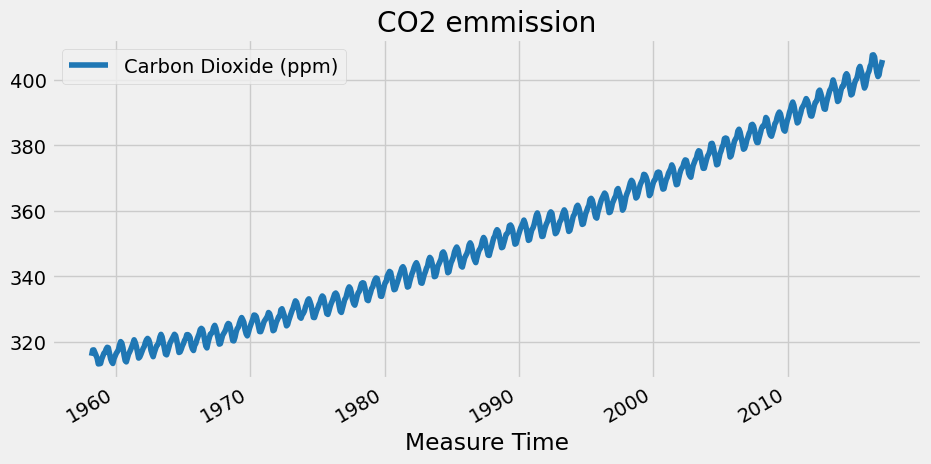

In [10]:
df.plot(style='-', figsize=(10,5), color=color_pal[0], title='CO2 emmission')
plt.show()

# Train/Test split

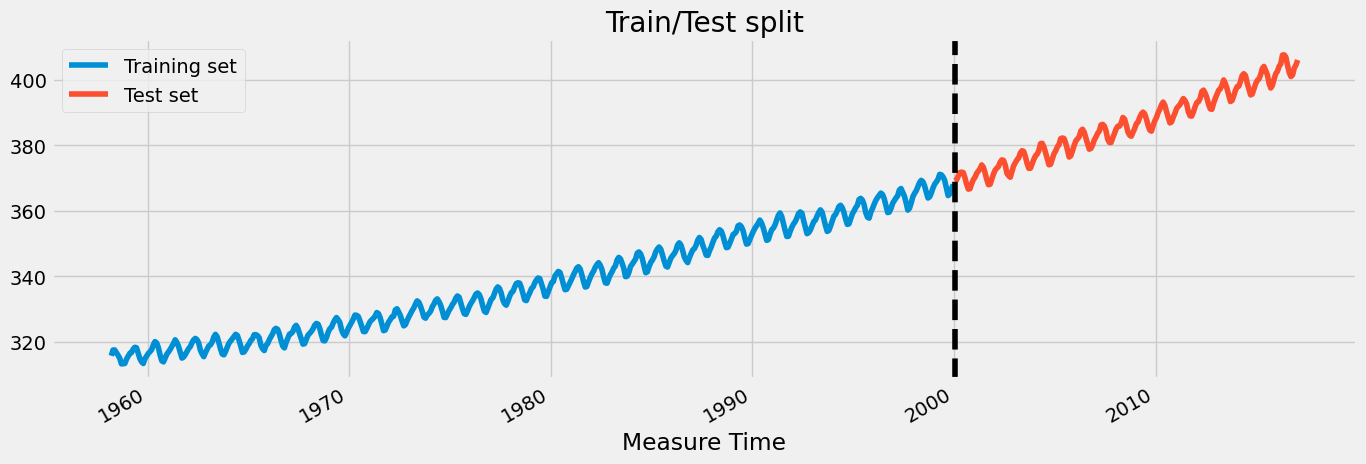

In [11]:
train=df.loc[df.index < '2000-01-15']
test=df.loc[df.index >= '2000-01-15']
fig,ax = plt.subplots (figsize=(15,5))
train.plot(ax=ax, label='Training set', title = 'Train/Test split')
test.plot(ax=ax, label='Test set')
ax.axvline('2000-01-15', color='black', ls='--')
ax.legend(['Training set','Test set'])
plt.show()

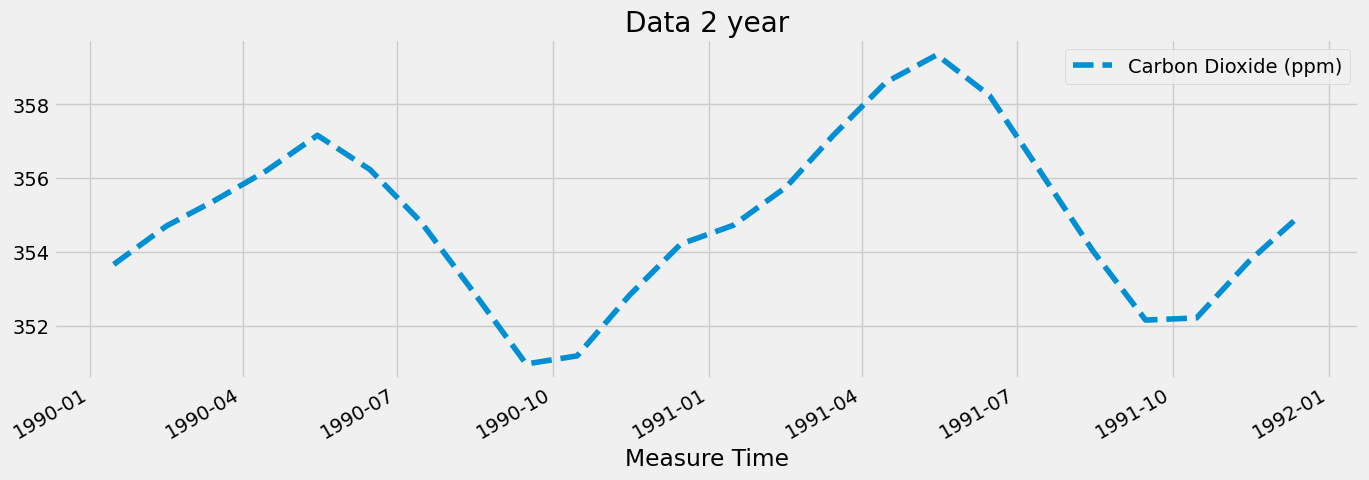

In [12]:
df.loc[(df.index >= '1990-01-15') & (df.index < '1992-01-15')].plot(figsize=(15,5), style='--' ,title='Data 2 year')
plt.show()

In [13]:
def create_features(df):
    #Create time series feature based on time series index
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    return df

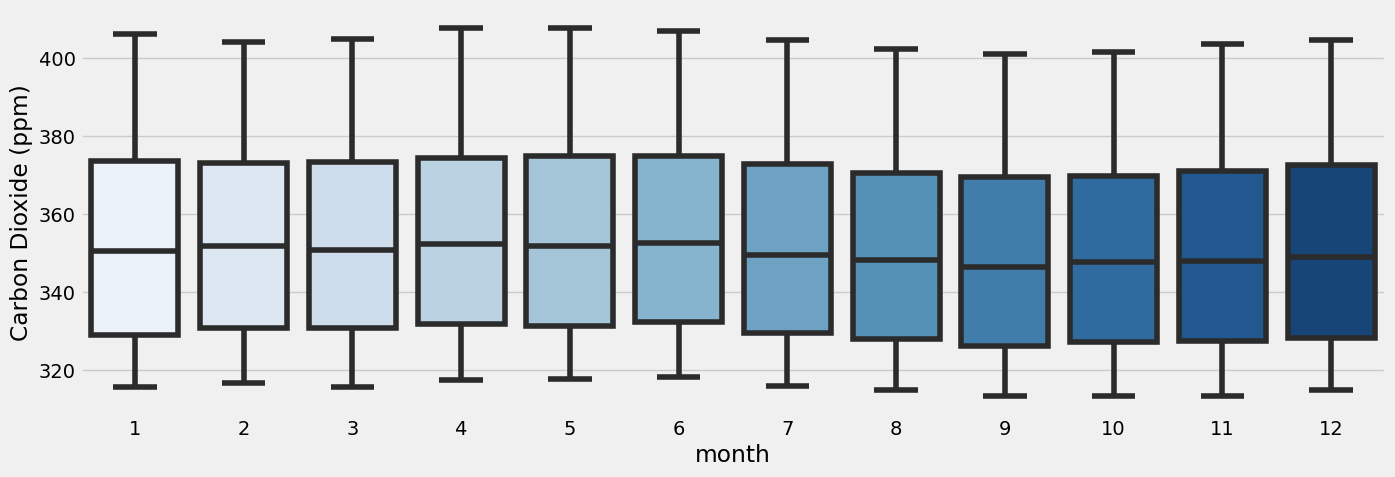

In [14]:
df=create_features(df)
fig, ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='month', y='Carbon Dioxide (ppm)', palette='Blues')
plt.show()

In [15]:
train=create_features(train)
test=create_features(test)
df.columns

Index(['Carbon Dioxide (ppm)', 'quarter', 'month', 'year'], dtype='object')

In [16]:
FEATURES = ['quarter', 'month', 'year']
TARGET = 'Carbon Dioxide (ppm)'

x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [17]:
reg = xgb.XGBRegressor(n_estimators=1000, max_depth = 7, eta = 0.1, subsample=0.7, colsample_bytree=0.8, early_stopping_rounds=50)
reg.fit(x_train, y_train,
       eval_set=[(x_train,y_train),(x_test, y_test)],
       verbose=100)

[0]	validation_0-rmse:304.66396	validation_1-rmse:351.99083
[100]	validation_0-rmse:0.22383	validation_1-rmse:20.83749
[200]	validation_0-rmse:0.11981	validation_1-rmse:20.57883
[300]	validation_0-rmse:0.08996	validation_1-rmse:20.56716
[311]	validation_0-rmse:0.08810	validation_1-rmse:20.56656


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=50,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

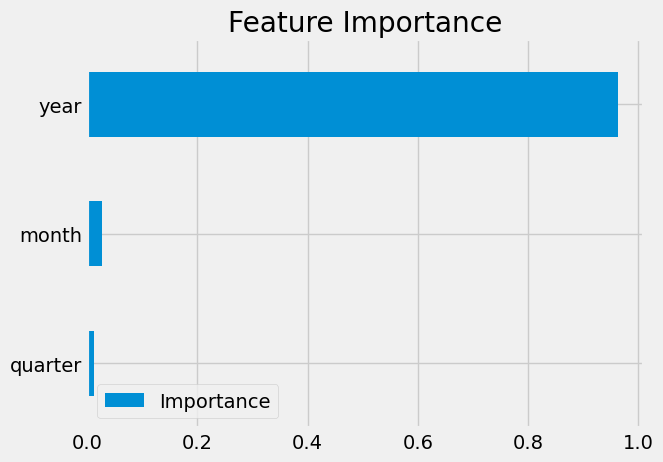

In [18]:
fi = pd.DataFrame(reg.feature_importances_,
                 index=reg.feature_names_in_,
                 columns=['Importance'])
fi.sort_values('Importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Forecast

In [19]:
test['Prediction'] = reg.predict(x_test)
df = df.merge(test['Prediction'], how='left', left_index=True, right_index=True)
df

,Carbon Dioxide (ppm),quarter,month,year,Prediction
Measure Time,,,,,
1958-03-15,315.69,1,3,1958,NaN
1958-04-15,317.45,2,4,1958,NaN
1958-05-15,317.50,2,5,1958,NaN
1958-07-15,315.86,3,7,1958,NaN
1958-08-15,314.93,3,8,1958,NaN
...,...,...,...,...,...
2016-09-15,401.01,3,9,2016,364.723267
2016-10-15,401.50,4,10,2016,365.218597
2016-11-15,403.64,4,11,2016,366.657715


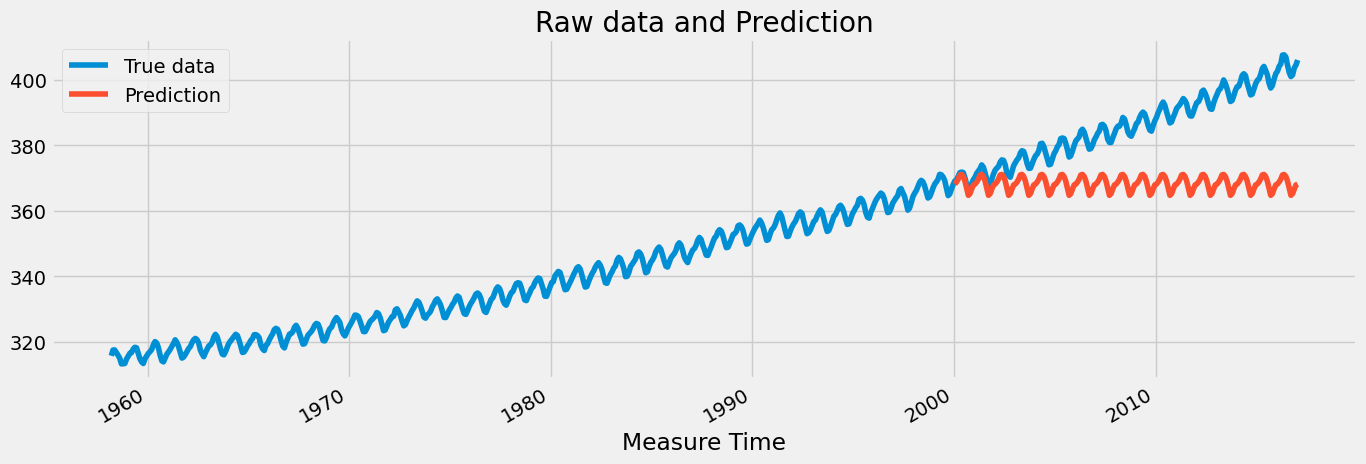

In [20]:
ax = df[['Carbon Dioxide (ppm)']].plot(figsize=(15,5))
df['Prediction'].plot(ax=ax, style='-')
plt.legend(['True data','Prediction'])
ax.set_title('Raw data and Prediction')
plt.show()

In [21]:
score = np.sqrt(mean_squared_error(test['Carbon Dioxide (ppm)'], test['Prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 20.56


# Calculation error

In [22]:
test['Error'] = np.abs(test['Carbon Dioxide (ppm)']-test['Prediction'])
test['year'] = test.index.date
test.groupby('year').mean()['Error'].sort_values(ascending=False).head(5)

year
2017-01-15    37.899010
2016-11-15    36.982285
2016-12-15    36.648145
2016-04-15    36.615471
2016-05-15    36.538702
Name: Error, dtype: float64

# Cross validation

In [23]:
from sklearn.model_selection import TimeSeriesSplit

In [30]:
# Create a generator to split dataset
tss = TimeSeriesSplit(n_splits=5)
df = df.sort_index()

In [26]:
df.columns

Index(['Carbon Dioxide (ppm)', 'quarter', 'month', 'year', 'Prediction'], dtype='object')

In [31]:
fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['quarter', 'month', 'year']
    TARGET = 'Carbon Dioxide (ppm)'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]
    
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[23:23:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:315.23528	validation_1-rmse:325.00996
[100]	validation_0-rmse:116.40810	validation_1-rmse:126.19547
[200]	validation_0-rmse:43.05626	validation_1-rmse:52.86301
[300]	validation_0-rmse:16.10262	validation_1-rmse:25.65212
[400]	validation_0-rmse:6.18658	validation_1-rmse:14.71374
[500]	validation_0-rmse:2.49837	validation_1-rmse:10.35268
[600]	validation_0-rmse:1.09599	validation_1-rmse:8.55292
[700]	validation_0-rmse:0.56719	validation_1-rmse:7.81601
[800]	validation_0-rmse:0.35954	validation_1-rmse:7.43572
[900]	validation_0-rmse:0.27255	validation_1-rmse:7.22687
[999]	validation_0-rmse:0.22855	validation_1-rmse:7.13204
[23:23:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgb

In [32]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 9.9484
Fold scores:[7.132044148441758, 9.1195500421847, 9.288373000895362, 11.60578227566257, 12.596368310090808]


In [33]:
# Retrain on all data
df = create_features(df)

FEATURES = ['quarter', 'month', 'year']
TARGET = 'Carbon Dioxide (ppm)'

X_all = df[FEATURES]
y_all = df[TARGET]
reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[23:25:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:349.25721
[100]	validation_0-rmse:128.53457
[200]	validation_0-rmse:47.40143
[300]	validation_0-rmse:17.57377
[400]	validation_0-rmse:6.62147
[499]	validation_0-rmse:2.63768


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [35]:
test=df.loc[df.index >= '2000-01-15']
x_test = test[FEATURES]
test['Prediction'] = reg.predict(x_test)
df = df.merge(test['Prediction'], how='left', left_index=True, right_index=True)

In [36]:
df

,Carbon Dioxide (ppm),quarter,month,year,Prediction_x,Prediction_y
Measure Time,,,,,,
1958-03-15,315.69,1,3,1958,NaN,NaN
1958-04-15,317.45,2,4,1958,NaN,NaN
1958-05-15,317.50,2,5,1958,NaN,NaN
1958-07-15,315.86,3,7,1958,NaN,NaN
1958-08-15,314.93,3,8,1958,NaN,NaN
...,...,...,...,...,...,...
2016-09-15,401.01,3,9,2016,364.723267,398.922333
2016-10-15,401.50,4,10,2016,365.218597,398.922333
2016-11-15,403.64,4,11,2016,366.657715,399.124634


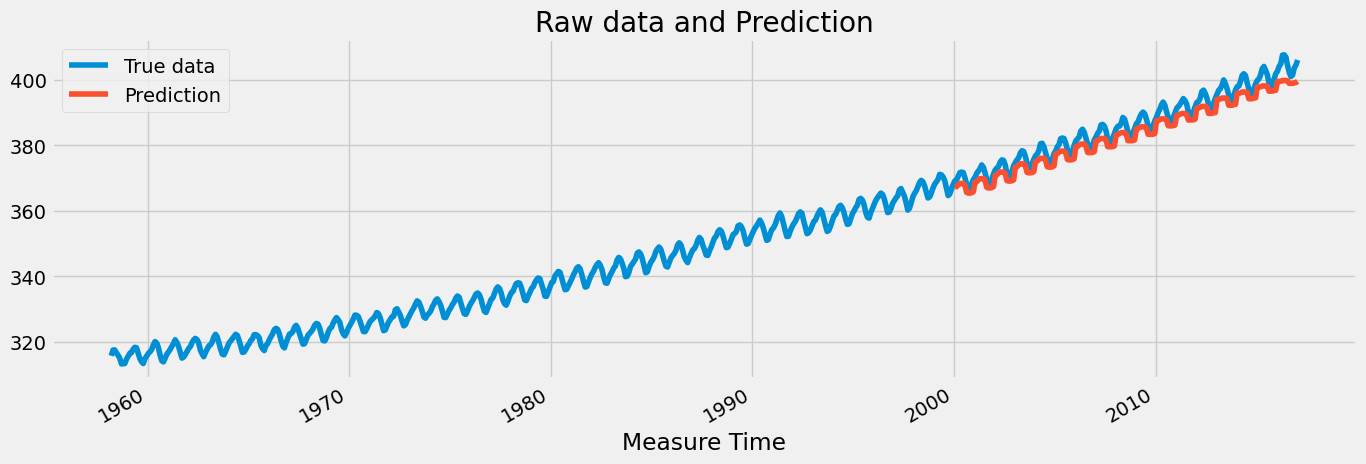

In [37]:
ax = df[['Carbon Dioxide (ppm)']].plot(figsize=(15,5))
df['Prediction_y'].plot(ax=ax, style='-')
plt.legend(['True data','Prediction'])
ax.set_title('Raw data and Prediction')
plt.show()